In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Build CNN model (deeper than MNIST)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,234 (735.29 KB)

 Trainable params: 188,234 (735.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 91ms/step - accuracy: 0.6939 - loss: 0.8477 - val_accuracy: 0.8595 - val_loss: 0.3852
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 137s 86ms/step - accuracy: 0.8514 - loss: 0.4134 - val_accuracy: 0.8808 - val_loss: 0.3284
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.8774 - loss: 0.3399 - val_accuracy: 0.8887 - val_loss: 0.3069
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.8927 - loss: 0.3023 - val_accuracy: 0.8940 - val_loss: 0.2841
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.8996 - loss: 0.2780 - val_accuracy: 0.9004 - val_loss: 0.2703
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.9067 - loss: 0.2548 - val_accuracy: 0.9039 - val_loss: 0.2696
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.9139 - loss: 0.2371 - val_accuracy: 0.9072 - val_loss: 0.2508
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.9173 - loss: 0.2246 -

In [6]:
# Function to preprocess custom image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img.reshape(1, 28, 28, 1).astype('float32') / 255.0
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


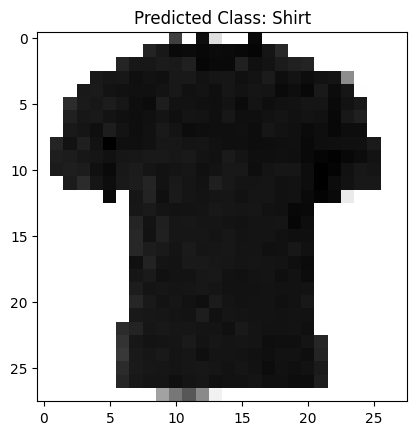

In [8]:
# Test with custom image (replace 'clothing.png' with your image path)
custom_img = preprocess_image('T-Shirt.png')
prediction = model.predict(custom_img)
predicted_class = np.argmax(prediction, axis=1)[0]
plt.imshow(custom_img.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Class: {class_names[predicted_class]}')
plt.show()